In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support, accuracy_score, plot_confusion_matrix,classification_report

In [2]:
df = pd.read_csv('mfeat-morphological_csv.csv')

In [3]:
df.head(15)

,att1,att2,att3,att4,att5,att6,class
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779,1
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822,1
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435,1
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281,1
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235,1
5,1.0,0.0,0.0,131.058861,1.310403,2027.211367,1
6,1.0,0.0,0.0,138.442861,1.379906,1918.750472,1
7,1.0,0.0,0.0,129.346861,1.305646,1547.263727,1
8,1.0,0.0,0.0,139.542861,1.374661,1871.055934,1
9,1.0,0.0,0.0,132.628861,1.374434,1884.680458,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    2000 non-null   float64
 1   att2    2000 non-null   float64
 2   att3    2000 non-null   float64
 3   att4    2000 non-null   float64
 4   att5    2000 non-null   float64
 5   att6    2000 non-null   float64
 6   class   2000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 109.5 KB


In [5]:
df.describe()

,att1,att2,att3,att4,att5,att6,class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000
mean,0.492500,1.733500,0.713500,156.418886,1.639569,6155.200435,5.500
std,0.664955,1.141985,0.699759,25.010014,0.291316,3757.634467,2.873
min,0.000000,0.000000,0.000000,99.508861,1.143130,1439.534940,1.000
25%,0.000000,1.000000,0.000000,135.014361,1.363562,3099.331040,3.000
50%,0.000000,2.000000,1.000000,150.063861,1.625846,5255.432237,5.500
75%,1.000000,3.000000,1.000000,175.728861,1.881523,9093.955756,8.000
max,2.000000,6.000000,5.000000,231.276861,2.558830,17572.199943,10.000


In [6]:
df.shape

(2000, 7)

<AxesSubplot:xlabel='class', ylabel='count'>

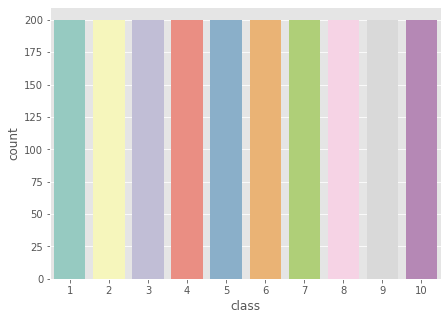

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(x='class',data=df,palette="Set3")

In [8]:
# Fetch the counts for each class
class_counts = df.groupby('class').size().reset_index()
class_counts.columns = ['class','No of articles']
class_counts

,class,No of articles
0,1,200
1,2,200
2,3,200
3,4,200
4,5,200
5,6,200
6,7,200
7,8,200
8,9,200
9,10,200


<AxesSubplot:xlabel='class', ylabel='att5'>

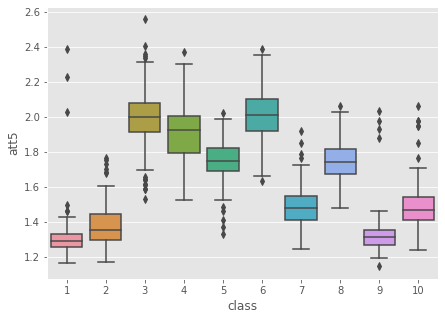

In [9]:
fig, axes = plt.subplots(figsize=(7,5))
sns.boxplot(x='class', y='att5', data=df, ax=axes)

In [10]:
x=df.columns[:-1]

<Figure size 1440x1440 with 0 Axes>

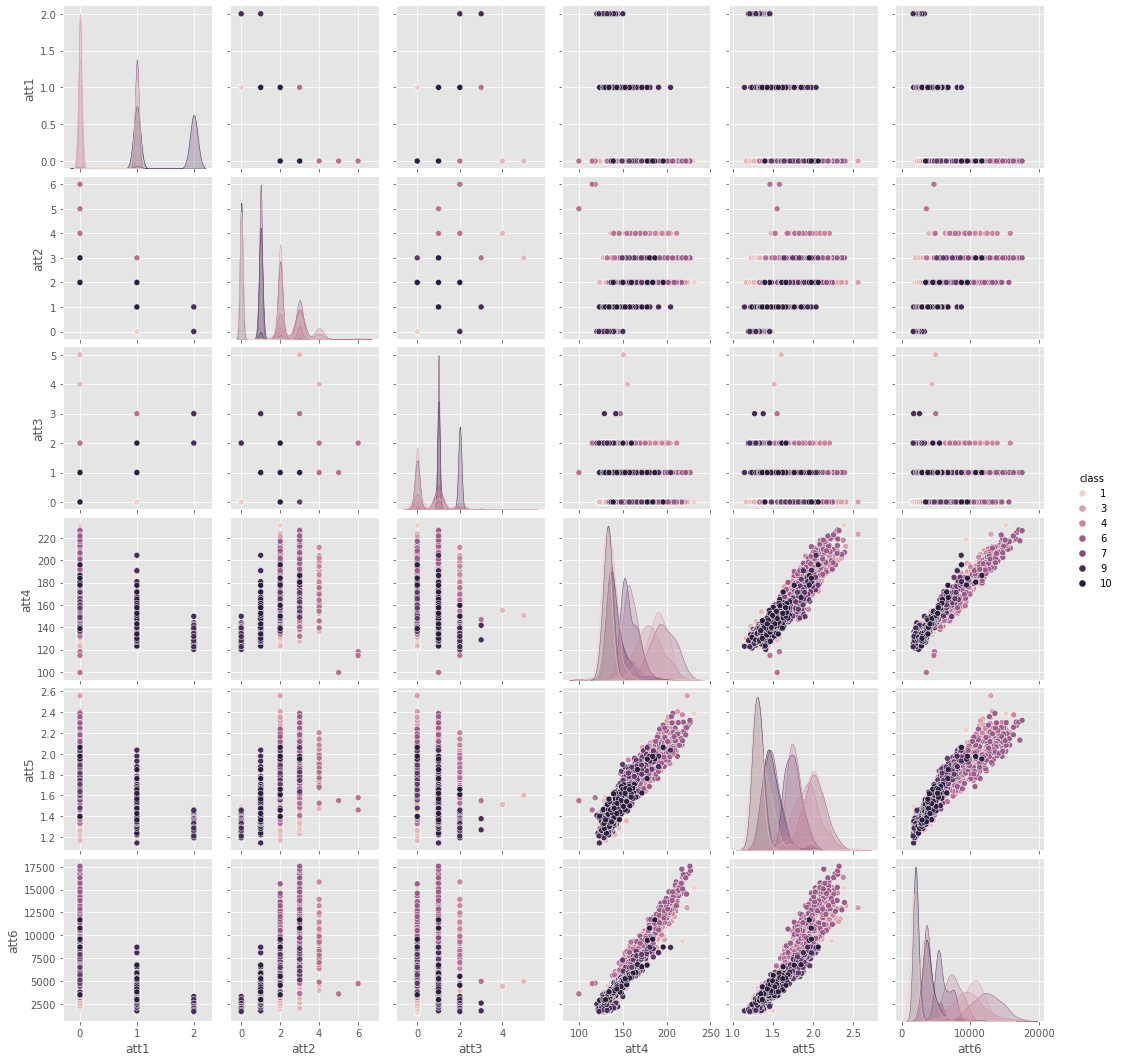

In [11]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='class', vars = x)

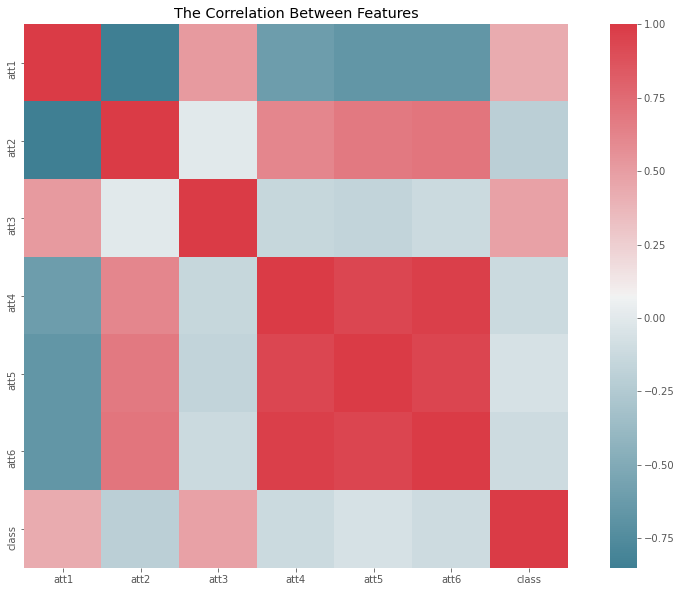

In [12]:
f, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('The Correlation Between Features')
plt.show()

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [14]:
#df['time']=df['time'].astype('string')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    2000 non-null   float64
 1   att2    2000 non-null   float64
 2   att3    2000 non-null   float64
 3   att4    2000 non-null   float64
 4   att5    2000 non-null   float64
 5   att6    2000 non-null   float64
 6   class   2000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 109.5 KB


In [16]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.5       , 0.        , 0.        , 0.25531237, 0.11906659,
        0.01120006],
       [0.5       , 0.        , 0.        , 0.20654484, 0.11274619,
        0.01052522],
       [0.5       , 0.        , 0.        , 0.24030872, 0.12425007,
        0.00802369],
       ...,
       [0.5       , 0.16666667, 0.2       , 0.26686297, 0.28173855,
        0.14425566],
       [0.5       , 0.16666667, 0.2       , 0.32950337, 0.20007829,
        0.16604773],
       [0.5       , 0.16666667, 0.2       , 0.26115597, 0.29772583,
        0.14681309]])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.30,shuffle=True,stratify=y)

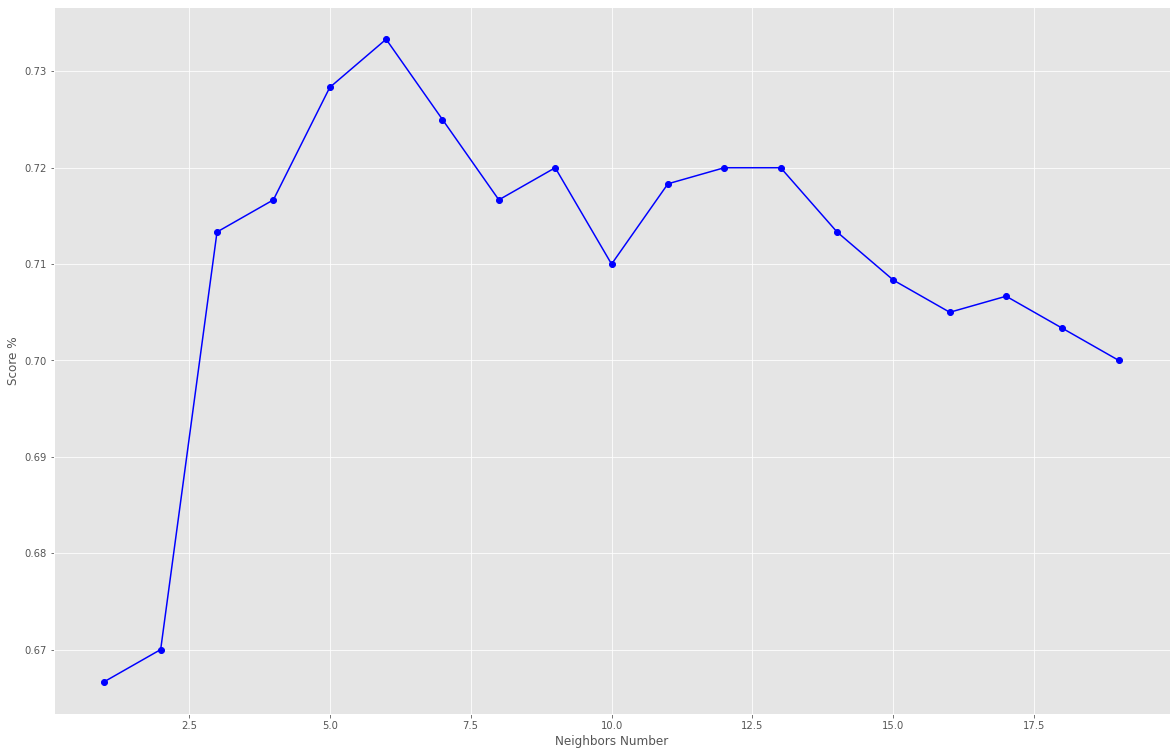

In [18]:
# KNN test run to determine the optimal n_neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_valid_score_list=[]
n_neighbors_num = np.arange(1,20)

for i in n_neighbors_num:
    test_knn = KNeighborsClassifier(n_neighbors=i)
    test_knn.fit(X_train, y_train)
    knn_valid_score_list.append(test_knn.score(X_test, y_test))
plt.figure(figsize=(20,13))    
plt.plot(n_neighbors_num,  knn_valid_score_list, "b")
plt.plot(n_neighbors_num,  knn_valid_score_list, "bo")
plt.xlabel("Neighbors Number")
plt.ylabel("Score %")
plt.grid(True)
plt.show()

In [19]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [20]:
y_pred_KNN = KNN.predict(X_test)
prf_knn=precision_recall_fscore_support(y_test, y_pred_KNN, average='macro')

In [21]:
# Model Evaluation Methods
kfold = KFold(n_splits=5)
score_KNN = accuracy_score(y_pred_KNN, y_test)
accuracy_results_KNN = cross_val_score(KNN, X_train, y_train, cv=kfold).mean()
Precision_KNN = prf_knn[0]
Recall_KNN = prf_knn[1]
f1_KNN = prf_knn[2]

In [22]:
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

[[59  0  1  0  0  0  0  0  0  0]
 [ 0 55  0  0  1  0  0  4  0  0]
 [ 0  0 47  4  1  4  1  3  0  0]
 [ 0  0  5 31 10 10  0  4  0  0]
 [ 0  2  2  8 43  0  0  5  0  0]
 [ 0  0 13  5  2 40  0  0  0  0]
 [ 0  1  0  0  0  0 30  0  0 29]
 [ 0  1  1  3  4  0  0 51  0  0]
 [ 0  0  0  0  0  0  0  0 59  1]
 [ 0  0  1  0  0  1 38  0  0 20]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        60
           2       0.93      0.92      0.92        60
           3       0.67      0.78      0.72        60
           4       0.61      0.52      0.56        60
           5       0.70      0.72      0.71        60
           6       0.73      0.67      0.70        60
           7       0.43      0.50      0.47        60
           8       0.76      0.85      0.80        60
           9       1.00      0.98      0.99        60
          10       0.40      0.33      0.36        60

    accuracy                           0.73       600
   macro avg       

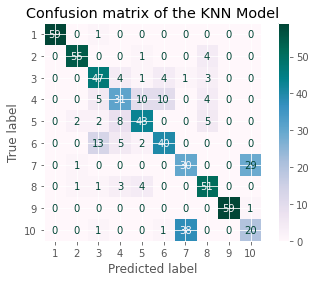

In [23]:
plot_confusion_matrix(KNN,X_test, y_test, cmap='PuBuGn')
plt.title('Confusion matrix of the KNN Model')
plt.show()

In [24]:
rfc = RandomForestClassifier(n_estimators=500,n_jobs=5, max_depth=25,
                                 random_state=0)
#Fitting the model
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=500, n_jobs=5, random_state=0)

In [25]:
y_pred_rfc = rfc.predict(X_test)
prf_rfc=precision_recall_fscore_support(y_test, y_pred_rfc, average='macro')

In [26]:
# Model Evaluation Methods
score_rfc = accuracy_score(y_pred_rfc, y_test)
accuracy_results_rfc = cross_val_score(rfc, X_train, y_train, cv=kfold).mean()
Precision_rfc = prf_rfc[0]
Recall_rfc = prf_rfc[1]
f1_rfc = prf_rfc[2]

In [27]:
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[59  0  1  0  0  0  0  0  0  0]
 [ 0 55  0  0  2  0  0  3  0  0]
 [ 0  0 44  6  0  6  0  3  0  1]
 [ 0  0  4 32 12  9  0  3  0  0]
 [ 0  3  4  8 40  0  0  5  0  0]
 [ 0  0 11  6  1 42  0  0  0  0]
 [ 0  1  0  0  0  0 18  0  0 41]
 [ 0  2  0  3  4  0  0 51  0  0]
 [ 0  0  0  0  0  0  0  0 60  0]
 [ 0  1  1  0  0  1 36  0  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        60
           2       0.89      0.92      0.90        60
           3       0.68      0.73      0.70        60
           4       0.58      0.53      0.56        60
           5       0.68      0.67      0.67        60
           6       0.72      0.70      0.71        60
           7       0.33      0.30      0.32        60
           8       0.78      0.85      0.82        60
           9       1.00      1.00      1.00        60
          10       0.33      0.35      0.34        60

    accuracy                           0.70       600
   macro avg       

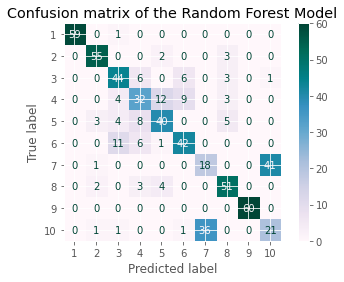

In [28]:
plot_confusion_matrix(rfc,X_test, y_test, cmap='PuBuGn')
plt.title('Confusion matrix of the Random Forest Model')
plt.show()

In [29]:
svc = SVC( kernel='rbf',gamma='auto')
svc.fit(X_train,y_train)

SVC(gamma='auto')

In [30]:
y_pred_svm = svc.predict(X_test)
prf_svc=precision_recall_fscore_support(y_test, y_pred_svm, average='macro')

In [31]:
# Model Evaluation Methods
score_svc = accuracy_score(y_pred_svm, y_test)
accuracy_results_svc = cross_val_score(svc, X_train, y_train, cv=kfold).mean()
Precision_svc = prf_svc[0]
Recall_svc = prf_svc[1]
f1_svc = prf_svc[2]

In [32]:
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[59  0  1  0  0  0  0  0  0  0]
 [ 0 55  0  0  2  0  0  3  0  0]
 [ 0  0 51  2  0  1  1  5  0  0]
 [ 0  0  6 28  8 11  0  7  0  0]
 [ 0  2  1  8 37  0  0 12  0  0]
 [ 0  0 26  7  2 25  0  0  0  0]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  1  2  0  7  0  0 50  0  0]
 [ 0  0  0  0  0  0  2  0 58  0]
 [ 0  0  1  0  0  1 58  0  0  0]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        60
           2       0.93      0.92      0.92        60
           3       0.58      0.85      0.69        60
           4       0.62      0.47      0.53        60
           5       0.66      0.62      0.64        60
           6       0.66      0.42      0.51        60
           7       0.49      0.98      0.66        60
           8       0.65      0.83      0.73        60
           9       1.00      0.97      0.98        60
          10       0.00      0.00      0.00        60

    accuracy                           0.70       600
   macro avg       

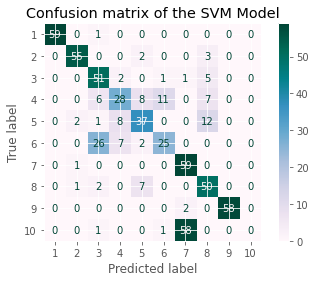

In [33]:
plot_confusion_matrix(svc,X_test, y_test, cmap='PuBuGn')
plt.title('Confusion matrix of the SVM Model')
plt.show()

In [34]:
knn_train_sizes, knn_train_scores, knn_valid_scores, *_ = learning_curve(KNN, X_train, y_train, n_jobs=-1,
                                                        random_state=42, cv=3)

svm_train_sizes, svm_train_scores, svm_valid_scores, *_ = learning_curve(svc, X_train, y_train, n_jobs=-1,
                                                        random_state=42, cv=3)

rf_train_sizes, rf_train_scores, rf_valid_scores, *_ = learning_curve(rfc, X_train, y_train, n_jobs=-1,
                                                        random_state=42, cv=3)

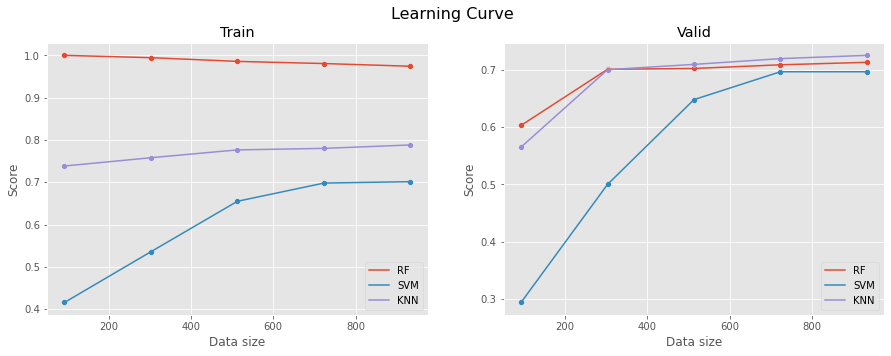

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Learning Curve', fontsize=16)
# The Training Plots
sns.scatterplot(ax=axes[0], x= rf_train_sizes, y= rf_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= rf_train_sizes, y= rf_train_scores.mean(axis=1))
sns.scatterplot(ax=axes[0], x= svm_train_sizes, y= svm_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= svm_train_sizes, y= svm_train_scores.mean(axis=1))
sns.scatterplot(ax=axes[0], x= knn_train_sizes, y= knn_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= knn_train_sizes, y= knn_train_scores.mean(axis=1))
axes[0].set_title('Train')
axes[0].set_xlabel('Data size')
axes[0].set_ylabel('Score')
axes[0].legend(['RF', 'SVM', 'KNN'])

# The Validation Plots
sns.scatterplot(ax=axes[1], x= rf_train_sizes, y= rf_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= rf_train_sizes, y= rf_valid_scores.mean(axis=1))
sns.scatterplot(ax=axes[1], x= svm_train_sizes, y= svm_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= svm_train_sizes, y= svm_valid_scores.mean(axis=1))
sns.scatterplot(ax=axes[1], x= knn_train_sizes, y= knn_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= knn_train_sizes, y= knn_valid_scores.mean(axis=1))
axes[1].set_title('Valid')
axes[1].set_xlabel('Data size')
axes[1].set_ylabel('Score')
axes[1].legend(['RF', 'SVM', 'KNN'])
plt.show()

In [36]:
model_performance_table = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'RF'],
    'Model Score': [score_svc, score_KNN, score_rfc],
    'Cross Validation': [accuracy_results_svc, accuracy_results_KNN, accuracy_results_rfc],
    'Valid Precision': [Precision_svc, Precision_KNN, Precision_rfc],
    'Valid Recall': [Recall_svc, Recall_KNN, Recall_rfc],
    'Valid F1 Score': [f1_svc, f1_KNN, f1_rfc]
})

model_performance_table.sort_values(by="Model Score", ascending=False)

,Model,Model Score,Cross Validation,Valid Precision,Valid Recall,Valid F1 Score
1,KNN,0.725000,0.720000,0.723964,0.725000,0.722750
0,SVM,0.703333,0.689286,0.659360,0.703333,0.665516
2,RF,0.703333,0.705000,0.699922,0.703333,0.701114
